In [ ]:
import numpy as np
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
from sklearn.utils import resample
import re
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
print(f"Amazon find food review Datset")
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
csv_file = os.path.join(path ,"Reviews.csv")
df = pd.read_csv(csv_file)


Amazon find food review Datset


In [ ]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df['Score'].value_counts()

,count
Score,
5,363122
4,80655
1,52268
3,42640
2,29769


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.columns.to_list()

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [ ]:
#EDA
print(f"Total reviews : {len(df)}")
df.info()
df.isnull().sum()

Total reviews : 568454
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df_clean = df[['Text' , 'Score']].dropna()
df_clean.head(2)
print(f"After cleaning data : {len(df_clean)}")
print("Rating Diatribution")
score_counts = df_clean['Score'].value_counts().sort_index()
print(score_counts)
print(f"Percentages")
for Score, count in score_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"Score {Score}: {percentage:.2f}%")

After cleaning data : 568454
Rating Diatribution
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64
Percentages
Score 1: 9.19%
Score 2: 5.24%
Score 3: 7.50%
Score 4: 14.19%
Score 5: 63.88%


In [ ]:
#1 star , 2 star , 3 star
print("Sample Review Analysis")
for score in[1,2,3,4,5]:
    sample_review = df_clean[df_clean['Score'] == score]['Text'].iloc[0]
    print(f"{score}_star review")
    print(f"Score {score} : {sample_review[:200]}")


Sample Review Analysis
1_star review
Score 1 : Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2_star review
Score 2 : If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor
3_star review
Score 3 : This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't 
4_star review
Score 4 : This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powd
5_star review
Score 5 : I have bought several of the Vitality canned dog food products 

In [ ]:
#data Viz
df_clean['text_length'] = df_clean['Text'].str.len()
df_clean['word_count'] = df_clean['Text'].str.split().str.len()

In [ ]:
df_clean

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31
2,This is a confection that has been around a fe...,4,509,94
3,If you are looking for the secret ingredient i...,2,219,41
4,Great taffy at a great price. There was a wid...,5,140,27
...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,149,26
568450,I'm disappointed with the flavor. The chocolat...,2,252,46
568451,"These stars are small, so you can give 10-15 o...",5,372,66
568452,These are the BEST treats for training and rew...,5,200,35


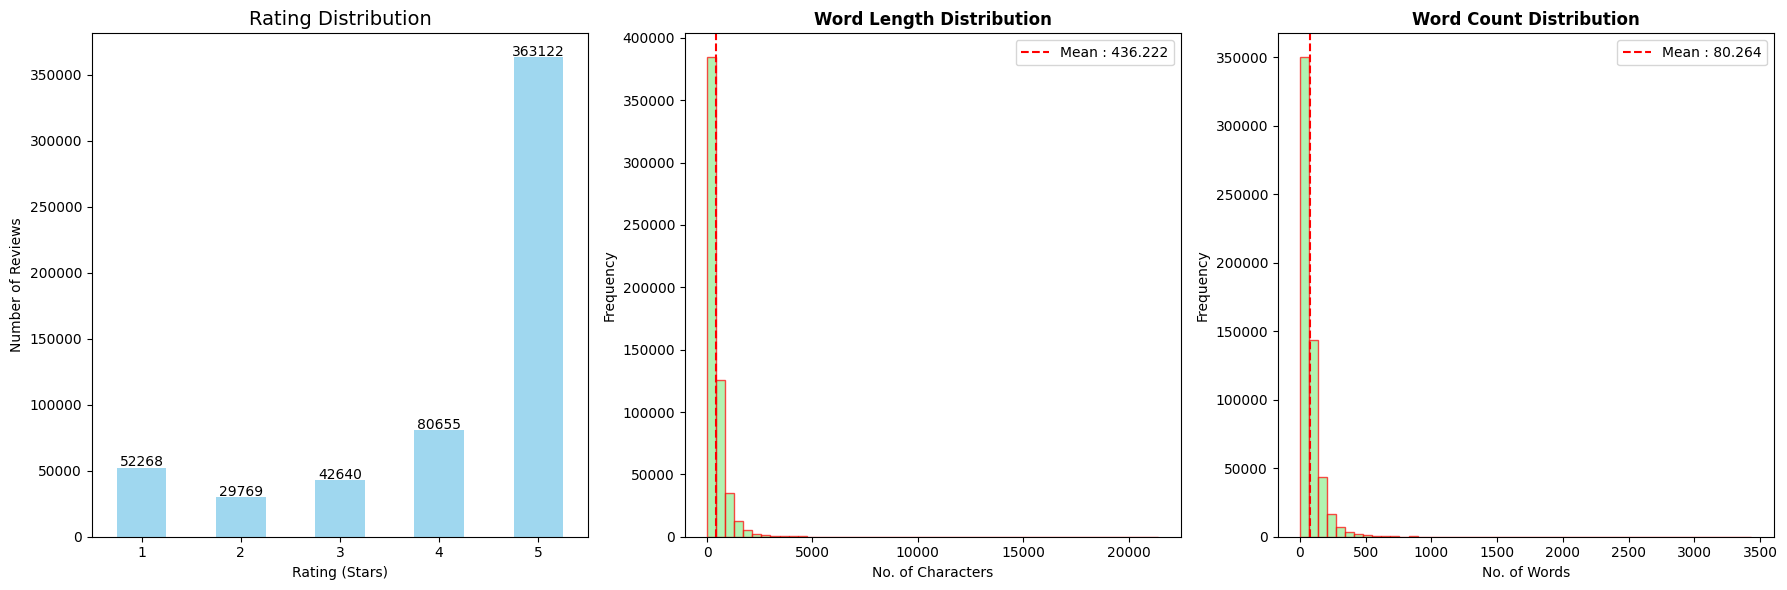

In [ ]:
#sizing the canvas
plt.figure(figsize=(18,6))

#plot 1 rating distribution
plt.subplot(1,3,1)
score_counts.plot(kind='bar', color='skyblue' , alpha=0.8)
plt.title('Rating Distribution', fontsize=14)
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
for idx,val in enumerate(score_counts):
    plt.text(idx, val+1000,f"{val:}" , ha='center')


#plot 2-Word Length Dist
plt.subplot(1,3,2)
plt.hist(df_clean['text_length'],bins=50 , alpha=0.7 , color='Lightgreen', edgecolor ='red')
plt.title('Word Length Distribution', fontweight='bold')
plt.xlabel('No. of Characters')
plt.ylabel('Frequency')
plt.axvline(df_clean['text_length'].mean(), color='red', linestyle='--', label=f"Mean : {df_clean['text_length'].mean():.3f}")
plt.legend()


#plot 3-Word Count Dist
plt.subplot(1,3,3)
plt.hist(df_clean['word_count'],bins=50 , alpha=0.7 , color='Lightgreen', edgecolor ='red')
plt.title('Word Count Distribution', fontweight='bold')
plt.xlabel('No. of Words')
plt.ylabel('Frequency')
plt.axvline(df_clean['word_count'].mean(), color='red', linestyle='--', label=f"Mean : {df_clean['word_count'].mean():.3f}")
plt.legend()



plt.tight_layout()




In [ ]:
#covert to binary classification
df_binary = df_clean[df_clean['Score'] != 3].copy() #apart from 3 all 1,2,4,5
df_binary['Score'].value_counts()

,count
Score,
5,363122
4,80655
1,52268
2,29769


In [ ]:
df_binary['sentimennt'] = (df_binary['Score'] >= 4).astype(int)
df_binary.head(2)

,Text,Score,text_length,word_count,sentimennt
0,I have bought several of the Vitality canned d...,5,263,48,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31,0


In [ ]:
print(f"Negative 1-2 : {len(df_binary[df_binary['sentimennt'] == 0])}")
print(f"Positive 4-5 : {len(df_binary[df_binary['sentimennt'] == 1])}")

Negative 1-2 : 82037
Positive 4-5 : 443777


In [ ]:
#check ombalance in data
negative_pct = (len(df_binary[df_binary['sentimennt'] == 0]) / len(df_binary)) * 100
positive_pct = (len(df_binary[df_binary['sentimennt'] == 1]) / len(df_binary)) * 100
print(f"Negative : {negative_pct:.2f}%")
print(f"Positive : {positive_pct:.2f}%")
if positive_pct > 70 :
  print(f"Dataset is imbalanced - skewed positive reveiws")
else:
  print(f"Dataset is balanced")

Negative : 15.60%
Positive : 84.40%
Dataset is imbalanced - skewed positive reveiws


In [ ]:
#handle imbalance
#seperations
negative_reviews = df_binary[df_binary['sentimennt'] == 0]
positive_reviews = df_binary[df_binary['sentimennt'] == 1]
#originiol imbalance
print(f"Original Imbalance")
print(f"Negative : {len(negative_reviews) :,} ({len(negative_reviews)/len(df_binary)})")
print(f"Positive : {len(positive_reviews) :,} ({len(positive_reviews)/len(df_binary)})")
#[undersample majority class]

n_minority = len(negative_reviews)
positive_downsampled = resample(positive_reviews,
                                replace=False, #sample without replacement
                                n_samples=n_minority, #minority
                                random_state=21)

#df_balanced
df_balanced = pd.concat([negative_reviews, positive_downsampled])
df_balanced['sentimennt'].value_counts()

#shuffle
df_balanced = df_balanced.sample(frac=1, random_state=21).reset_index(drop=True)
df_balanced['sentimennt'].value_counts()




Original Imbalance
Negative : 82,037 (0.15601904856089796)
Positive : 443,777 (0.843980951439102)


,count
sentimennt,
1,82037
0,82037


In [ ]:
print(f"after balance")
print(f"Total samples : {len(df_balanced)}")
print(f"Negative  : {len(df_balanced[df_balanced['sentimennt'] == 0])} ({sum(df_balanced['sentimennt'] ==0) / len(df_balanced) **100})")
print(f"Positive  : {len(df_balanced[df_balanced['sentimennt'] == 1])} ({sum(df_balanced['sentimennt'] ==1) / len(df_balanced) **100})")

after balance
Total samples : 164074
Negative  : 82037 (0.0)
Positive  : 82037 (0.0)


In [ ]:
# take a sample
sample_size = min (50000,len(df_binary))
df_sample = df_balanced.sample(n=sample_size, random_state=21)

sample_nagative = df_sample[df_sample['sentimennt'] == 0]
sample_positive = df_sample[df_sample['sentimennt'] == 1]
print(f"sample_nagative : {len(sample_nagative)}")
print(f"sample_positive : {len(sample_positive)}")

sample_nagative : 25061
sample_positive : 24939


In [ ]:
# clean - text :: 1)convert lower case,
                #2) remove special characters()
                #3) keep only letters and spaces
                #4) Extra whitespace


In [ ]:
def clean_text(text):
    text = text.lower()
    #remove all special characters ,numbers...  keeping only letters and numbers
    text = re.sub(r'[^a-zA-Z\s]','',text)
    #remove all white spaces
    text = ' '.join(text.split())
    return text

print("+++Text Preprocessing+++++")
df_balanced['clean_text'] = df_balanced['Text'].apply(clean_text)
df_balanced



+++Text Preprocessing+++++


,Text,Score,text_length,word_count,sentimennt,clean_text
0,Our family now uses this in place of butter or...,5,323,65,1,our family now uses this in place of butter or...
1,the k- cups were thrown in an oversized box wi...,1,208,41,0,the k cups were thrown in an oversized box wit...
2,I usually go to China town whereever I happen ...,5,270,54,1,i usually go to china town whereever i happen ...
3,"Used to buy them from Sam's Club, but they wer...",5,151,28,1,used to buy them from sams club but they were ...
4,"Great product, great price from amazon while u...",5,135,20,1,great product great price from amazon while us...
...,...,...,...,...,...,...
164069,I works fine but unless you are a commercial p...,2,244,43,0,i works fine but unless you are a commercial p...
164070,"First, the other happy baby flavors have been ...",1,390,74,0,first the other happy baby flavors have been a...
164071,"We like all of the Crystal Light mixes, but fi...",5,308,58,1,we like all of the crystal light mixes but fin...
164072,VERY Disappointing --- doesn't taste like coff...,1,148,28,0,very disappointing doesnt taste like coffee an...


In [ ]:
#RNN LSTM
#Tokanization

from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_FEATURES = 10000 #VOCABULARY
MAX_LEN = 100 #maximum sequence length

print(f"maximum vocabulary size : {MAX_FEATURES} words")
print(f"maximum sequence length : {MAX_LEN}  words")




maximum vocabulary size : 10000 words
maximum sequence length : 100  words


In [ ]:

x = df_balanced['clean_text'].values
y = df_balanced['sentimennt'].values

tokanizer = Tokenizer(num_words=MAX_FEATURES ,oov_token='<oov>')
tokanizer.fit_on_texts(x)
x_sequences = tokanizer.texts_to_sequences(x)

#padding
x_padded = pad_sequences(x_sequences, maxlen=MAX_LEN , padding='post', truncating='post')

print(f"Actual vocabulary size: {len(tokanizer.word_index)}  words ")
print(f"final sequence shape: {x_padded.shape}")






Actual vocabulary size: 113343  words 
final sequence shape: (164074, 100)


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164074 entries, 0 to 164073
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Text         164074 non-null  object
 1   Score        164074 non-null  int64 
 2   text_length  164074 non-null  int64 
 3   word_count   164074 non-null  int64 
 4   sentimennt   164074 non-null  int64 
 5   clean_text   164074 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.5+ MB


In [ ]:
#look at the final data
print(f"org text : {x[0][:100]}")
print(f"sequence : {x_sequences[0][:20]}")
print(f"padded shape : {x_padded[0].shape}")



org text : our family now uses this in place of butter or other oils for all our cooking needs it tastes sooo g
sequence : [118, 380, 93, 1000, 9, 11, 613, 8, 301, 36, 59, 1086, 12, 41, 118, 657, 709, 7, 129, 3126]
padded shape : (100,)


In [ ]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x_padded,
    y,
    test_size=0.2,
    random_state=21,
    stratify=y
)

print(f"train shape : {x_train.shape[0]}")
print(f"test shape : {x_test.shape[0]}")
print(f"shape of features : {x_train.shape[1]}")

#balance
train_pos = sum(y_train)

test_pos = sum(y_test )


print(f"training pos : {train_pos} ({train_pos/len(y_train) * 100:.2f}%)")
print(f"testing pos : {test_pos} ({test_pos/len(y_train) * 100:.2f}%)")

train shape : 131259
test shape : 32815
shape of features : 100
training pos : 65629 (50.00%)
testing pos : 16408 (12.50%)


In [ ]:
#rnn
from tensorflow.keras.layers import Embedding,SimpleRNN,LSTM,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential


In [ ]:
def create_rnn_model():
  model = Sequential([
      Embedding(input_dim=MAX_FEATURES , output_dim=128 , input_length=MAX_LEN),
      SimpleRNN(units=64,return_sequences=False),
      Dropout(0.5),
      Dense(units=32, activation='relu'),
      Dense(units=1, activation='sigmoid')
  ])
  return model

rnn_model = create_rnn_model()

rnn_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'])


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
rnn_model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn_history = rnn_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1,
    #callbacks=[
        #EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        #ModelCheckpoint(filepath='rnn_model.h5', save_best_only=True)
    #]
)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.5193 - loss: 0.6928 - val_accuracy: 0.5388 - val_loss: 0.6888
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 75s 92ms/step - accuracy: 0.5168 - loss: 0.6959 - val_accuracy: 0.5873 - val_loss: 0.6752
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 75s 91ms/step - accuracy: 0.5866 - loss: 0.6715 - val_accuracy: 0.6326 - val_loss: 0.6448
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 72s 88ms/step - accuracy: 0.6396 - loss: 0.6445 - val_accuracy: 0.6490 - val_loss: 0.6358
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.6786 - loss: 0.6083 - val_accuracy: 0.7759 - val_loss: 0.4797


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 73s 85ms/step - accuracy: 0.5230 - loss: 0.6907 - val_accuracy: 0.5489 - val_loss: 0.6795
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.5613 - loss: 0.6674 - val_accuracy: 0.5341 - val_loss: 0.6847
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 92s 92ms/step - accuracy: 0.6064 - loss: 0.6145 - val_accuracy: 0.5651 - val_loss: 0.6808
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 76s 85ms/step - accuracy: 0.6490 - loss: 0.5533 - val_accuracy: 0.5605 - val_loss: 0.7037
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.6728 - loss: 0.5153 - val_accuracy: 0.5808 - val_loss: 0.7517


In [ ]:
final_train_acc = rnn_history.history['accuracy'][-1]
print(f"Final Training Accuracy : {final_train_acc * 100:.2f}%")
final_val_acc = rnn_history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy : {final_val_acc * 100:.2f}%")


Final Training Accuracy : 67.22%
Final Validation Accuracy : 58.08%


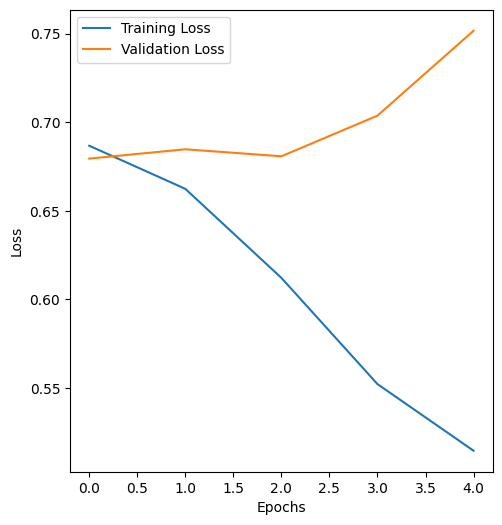

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



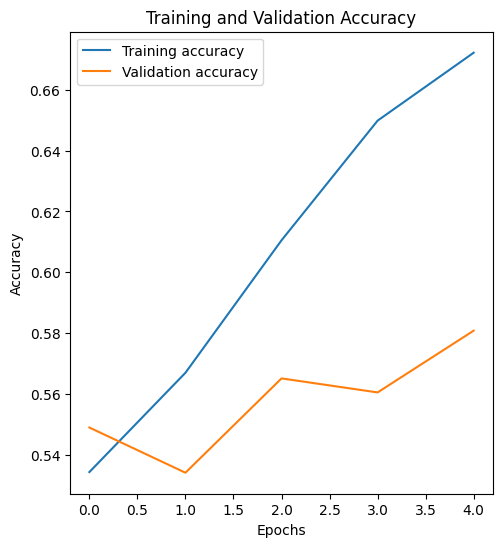

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(rnn_history.history['accuracy'], label='Training accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#create lstm model
def create_lstm_model():
    model = Sequential([
        Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_LEN),
        LSTM(units=64, return_sequences=False),  # LSTM layer
        Dropout(0.5),
        Dense(units=32, activation='relu'),
        Dense(units=1, activation='sigmoid')    # Binary classification
    ])

    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

# Create the model
lstm_model = create_lstm_model()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn_history = rnn_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1,
    #callbacks=[
        #EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        #ModelCheckpoint(filepath='rnn_model.h5', save_best_only=True)
    #]
)